# How to be Choosy: Billboard Hot 100
_by Michelle Hoda Wilkerson_

<div class="alert alert-block alert-info"> <b>NOTE:</b> This notebook is written to illustrate the data wrangling moves described in [anonymized manuscript], using a dataset about songs that have charted on the Billboard Hot 100 charts (see <a href="#about">here</a> for more information). Some of the text below is excerpted from the manuscript. Each section below corresponds to a subheading in the manuscript. See also How to be Choosy: 2022 CA Toxic Release Inventory. </div>

With any Jupyter notebook, we begin by importing the necessary libraries. You should run the cell below before running any other code. Here, we are using the `pandas` library, an industry standard that provides us with special methods for reading in and working with data in Python. We also import the `datetime` library to help us process and sort date information in the dataset. Matplotlib helps us with data visualization.

In [1]:
import pandas # for data wrangling
import datetime # to handle dates
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np # for calculations

# if there are more than 10 records to show in a table, only show the first and last 5
pandas.set_option('display.max_rows', 10) 

# read the contents of bh100.csv into a dataframe
bh100 = pandas.read_csv("bh100.csv")

# Table of Contents
* [Introduction to the BH100 Dataset](#Introduction-to-BH100-)
* [Wrangling Too Many Cases](#Wrangling-Too-Many-Cases-)
    * [Random Selection](#Random-Selection-)
    * [Purposeful Selection by Attribute(s)](#Purposeful-Selection-by-Attribute(s)-)
    * [Building Your Own Selection Attribute](#Building-Your-Own-Selection-Attribute-)
* [Wrangling Too Many Attributes](#Wrangling-Too-Many-Attributes-)
    * [Thematic Selection](#Thematic-Selection-)
    * [Pattern-Driven Selection](#Pattern-Driven-Selection-)
    * [Question-Driven Selection](#Question-Driven-Selection-)
* [More About This Dataset](#About-the-Billboard-Hot-100-Dataset-)

# Introduction to BH100

Let's check out the dataset. In the setup code above, we read the csv file and used the `pandas` library to process this information and turn it into a data frame called `bh100`. The line below, which just says `bh100`, will give a brief summary of the contents of the dataframe so you can check and make sure it has been read and processed correctly. Since there are too many cases to list, you will see the first five rows and the last five rows of the dataset, with "..." in the middle to indicate there are more cases that are not shown.

In [2]:
bh100 # show us the contents of the new data frame

,Song Name,Performer,Year Released,Highest BH100 Position,Month Released,Spotify Popularity,First Week BH100,Last Week BH100,Weeks on BH100,Spotify Genre Full List,...,Valence,Tempo,Time Signature,Rock,Latin Pop,Rap,Dance,Novelty,Adult Standards,Rhythm N Blues
0,4 Da Gang,42 Dugg & Roddy Ricch,2021,67,4,NaN,4/17/2021,5/29/2021,7,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
1,ZaZa,6ix9ine,2021,90,3,67.0,3/6/2021,3/6/2021,1,['emo rap'],...,0.698,175.985,4.0,False,False,True,False,False,False,False
2,Way Less Sad,AJR,2021,85,5,70.0,5/8/2021,5/29/2021,4,"['modern rock', 'pop rap']",...,0.400,140.015,4.0,True,False,True,False,False,False,False
3,Monsters,All Time Low Featuring Demi Lovato & blackbear,2021,55,1,NaN,1/9/2021,5/1/2021,17,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
4,Better Days,Ant Clemons Featuring Justin Timberlake,2021,94,1,NaN,1/30/2021,1/30/2021,1,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29489,Young And Warm And Wonderful,Tony Bennett,1958,59,8,6.0,8/2/1958,8/9/1958,2,"['adult standards', 'easy listening', 'vocal j...",...,0.195,93.070,4.0,False,False,False,False,False,True,False
29490,Firefly,Tony Bennett,1958,20,9,42.0,9/6/1958,11/29/1958,13,"['adult standards', 'easy listening', 'vocal j...",...,0.676,92.173,4.0,False,False,False,False,False,True,False
29491,Come Prima,Tony Dallara,1958,60,12,21.0,12/6/1958,1/17/1959,7,['classic italian pop'],...,0.651,112.311,3.0,False,False,False,False,False,False,False
29492,Here I Stand,Wade Flemons and the Newcomers,1958,80,12,NaN,12/20/1958,2/7/1959,5,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False


At the bottom of the output from our code above, we can see the specific dimensions of this dataset. It has 29494 cases (rows), and 35 attributes (columns). Below, we model the different wrangling strategies described in _How to be Choosy_ to reduce the size and/or complexity of the `bh100` dataset so that it is more appropriate for different educational applications.

# Wrangling Too Many Cases <a id="cases"></a>

## Random Selection <a id="random"></a>

Random selection extracts random rows from a large dataset to create one of a more manageable size. This is the most appropriate strategy for downsizing a dataset while preserving a representative snapshot of the full phenomenon to be studied. Starting with your dataframe, you can create a random selection from that dataframe using the sample() method. Below, we select exactly 5000 random cases from the `bh100` dataset and save them as a new reduced dataset called bh100reduced. If you run the code more than once, you will see that different cases are included in the dataset output each time.

In [3]:
bh100random = bh100.sample(5000) # put a randomly selected 5000 rows in bh100reduced
bh100random

,Song Name,Performer,Year Released,Highest BH100 Position,Month Released,Spotify Popularity,First Week BH100,Last Week BH100,Weeks on BH100,Spotify Genre Full List,...,Valence,Tempo,Time Signature,Rock,Latin Pop,Rap,Dance,Novelty,Adult Standards,Rhythm N Blues
614,I Can Show You,Lil Uzi Vert,2020,66,3,59.0,3/28/2020,3/28/2020,1,"['melodic rap', 'philly rap', 'rap', 'trap']",...,0.314,139.915,4.0,False,False,True,False,False,False,False
16768,Can We Still Be Friends,Robert Palmer,1979,52,12,40.0,12/22/1979,2/16/1980,9,"['album rock', 'art rock', 'classic rock', 'cl...",...,0.815,96.476,4.0,True,False,False,True,False,False,False
20089,I Didn't Know I Loved You (Till I Saw You Rock...,Gary Glitter,1972,35,11,44.0,11/4/1972,12/30/1972,9,[],...,0.807,130.338,4.0,False,False,False,False,False,False,False
6436,With Love,Hilary Duff,2007,24,3,45.0,3/31/2007,5/26/2007,9,"['dance pop', 'pop', 'post-teen pop']",...,0.961,121.978,4.0,False,False,False,True,False,False,False
1345,Clout,Offset Featuring Cardi B,2019,39,3,80.0,3/9/2019,8/31/2019,20,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",...,0.424,140.022,4.0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21909,She Lets Her Hair Down (Early In The Morning),Gene Pitney,1969,89,12,5.0,12/13/1969,1/24/1970,5,"['adult standards', 'brill building pop', 'bub...",...,0.694,122.054,4.0,True,False,False,False,False,True,False
13162,System Of Survival,"Earth, Wind & Fire",1987,60,10,42.0,10/31/1987,1/23/1988,13,"['disco', 'funk', 'jazz funk', 'motown', 'quie...",...,0.887,120.920,4.0,False,False,False,False,False,False,False
20682,Ooh Poo Pah Doo,Ike & Tina Turner,1971,60,5,20.0,5/15/1971,6/26/1971,7,"['brill building pop', 'classic soul', 'motown...",...,0.408,102.797,4.0,False,False,False,False,False,False,False
19805,Leaving Me,The Independents,1973,21,4,30.0,4/7/1973,6/30/1973,13,[],...,0.571,73.394,4.0,False,False,False,False,False,False,False


A related technique is interpolated selection, or selecting every <i>n</i>th row of a data table. This might be useful when the order of the data matters (for example, if records are organized by date and you are interested in modeling patterns over time). However, we do not recommend interpolated selection unless you have a specific reason for using this method, because it can also lead to unintentionally non-random sampling.

In [4]:
bh100reduced = bh100.iloc[::6, :] # put every 6th row of bh100 in bh100reduced
bh100reduced

,Song Name,Performer,Year Released,Highest BH100 Position,Month Released,Spotify Popularity,First Week BH100,Last Week BH100,Weeks on BH100,Spotify Genre Full List,...,Valence,Tempo,Time Signature,Rock,Latin Pop,Rap,Dance,Novelty,Adult Standards,Rhythm N Blues
0,4 Da Gang,42 Dugg & Roddy Ricch,2021,67,4,NaN,4/17/2021,5/29/2021,7,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
6,Test Drive,Ariana Grande,2021,61,3,74.0,3/6/2021,3/6/2021,1,"['dance pop', 'pop', 'post-teen pop']",...,0.322,115.036,4.0,False,False,False,True,False,False,False
12,Lo Vas A Olvidar,Billie Eilish & ROSALIA,2021,62,2,NaN,2/6/2021,2/6/2021,1,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
18,Lady,Brett Young,2021,52,1,72.0,1/16/2021,5/29/2021,19,['contemporary country'],...,0.428,169.954,4.0,False,False,False,False,False,False,False
24,Big Purr (Prrdd),Coi Leray & Pooh Shiesty,2021,69,4,8.0,4/10/2021,4/24/2021,3,NaN,...,0.380,139.943,4.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29466,Down The Aisle Of Love,The Quin-Tones,1958,20,8,13.0,8/16/1958,11/1/1958,12,['classic girl group'],...,0.427,95.210,3.0,False,False,False,False,False,False,False
29472,You Cheated,The Slades,1958,42,8,42.0,8/2/1958,11/1/1958,12,[],...,0.410,65.800,4.0,False,False,False,False,False,False,False
29478,The Green Mosquito,The Tune Rockers,1958,44,8,0.0,8/23/1958,10/25/1958,10,[],...,0.907,130.273,4.0,False,False,False,False,False,False,False
29484,Where The Blue Of The Night,Tommy Mara,1958,76,8,1.0,8/16/1958,9/13/1958,4,[],...,0.856,92.850,4.0,False,False,False,False,False,False,False


## Purposeful Selection by Attribute(s) <a id="purposeful"></a>

Purposeful selection involves reducing a dataset so that it only includes records with certain characteristics related to one or more attributes. This method is appropriate if you suspect that the majority of records in your too-large dataset are not useful or usable for your intended activity. To get all the cases in a dataframe that meet certain conditions, use the expression dataframe[condition]. Below, we want only the songs that reached 1 in the charts, represented by cases in bh100 where the value of ‘Highest BH100 Position’ is equal to 1.

In [5]:
topsongs = bh100['Highest BH100 Position']==1  # for each song, see if the highest position was 1
bh100reduced = bh100[topsongs]                 # put only top song records in the reduced dataset
bh100reduced

,Song Name,Performer,Year Released,Highest BH100 Position,Month Released,Spotify Popularity,First Week BH100,Last Week BH100,Weeks on BH100,Spotify Genre Full List,...,Valence,Tempo,Time Signature,Rock,Latin Pop,Rap,Dance,Novelty,Adult Standards,Rhythm N Blues
20,Up,Cardi B,2021,1,2,89.0,2/20/2021,5/29/2021,15,"['dance pop', 'pop', 'pop rap', 'rap']",...,0.8190,166.000,4.0,False,False,True,True,False,False,False
45,What's Next,Drake,2021,1,3,69.0,3/20/2021,5/29/2021,11,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.0636,129.918,4.0,False,False,True,False,False,False,False
99,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,2021,1,4,NaN,4/3/2021,5/29/2021,9,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
116,Montero (Call Me By Your Name),Lil Nas X,2021,1,4,100.0,4/10/2021,5/29/2021,8,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",...,0.7580,178.818,4.0,False,False,True,False,False,False,False
163,Drivers License,Olivia Rodrigo,2021,1,1,95.0,1/23/2021,5/29/2021,19,['pop'],...,0.1320,143.874,4.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29428,Little Star,The Elegants,1958,1,8,40.0,8/2/1958,11/22/1958,17,"['doo-wop', 'rhythm and blues']",...,0.6970,72.615,4.0,False,False,False,False,False,False,True
29452,Tom Dooley,The Kingston Trio,1958,1,9,43.0,9/27/1958,2/14/1959,21,"['american folk revival', 'bubblegum pop', 'fo...",...,0.4970,125.974,4.0,True,False,False,False,False,False,False
29461,Smoke Gets In Your Eyes,The Platters,1958,1,11,63.0,11/15/1958,3/21/1959,19,"['adult standards', 'brill building pop', 'doo...",...,0.2850,171.222,3.0,True,False,False,False,False,True,False
29474,"To Know Him, Is To Love Him",The Teddy Bears,1958,1,9,30.0,9/20/1958,2/21/1959,23,[],...,0.3900,174.252,3.0,False,False,False,False,False,False,False


## Building Your Own Selection Attribute <a id="byo"></a>

There are other ways of creating a smaller dataset based on information that is not already available in the dataset itself. These could be specific cases that you identify manually, or cases you might identify using computer code to extract some new, meaningful information from the attributes you already have. These techniques allow teachers and students the most customization, but they require careful planning to select and identify which cases should be included and to consider how those decisions will shape what analyses and claims are appropriate. 

### By Identifying Specific Indices

Sometimes, you may want to create a small dataset through manually selecting a small number of cases from a larger data corpus. This can be helpful, for example, if you would like students to explore the meaning of different attributes and measures using a small, familiar dataset before diving into larger-scale analyses. One way to do this is by building a list of the ID numbers or _indices_ of the songs you want to include. Below is code you can use to find out what your favorite song indices are and use those to create a list. In the Toxic Release Inventory notebook, we show how you can construct a list directly using text searches.

In [6]:
# use the lines below find the indices of the songs you want to include by name
# for example, let's see if the dataset has Adele's velvety epic "Skyfall."
# If the song with this title is in the dataset, the second line of code will output
# the full record for the song. If a song with the title does not exist in the dataset, 
# it will output an empty table.

favoriteSong = bh100['Song Name']=="Skyfall" # look up the song by name
bh100[favoriteSong]                          # show the full record of the song

# The number in bold, in the first column of the table above, is the song's ID
# Try looking for a few of your favorite songs!

,Song Name,Performer,Year Released,Highest BH100 Position,Month Released,Spotify Popularity,First Week BH100,Last Week BH100,Weeks on BH100,Spotify Genre Full List,...,Valence,Tempo,Time Signature,Rock,Latin Pop,Rap,Dance,Novelty,Adult Standards,Rhythm N Blues
4153,Skyfall,Adele,2012,8,10,74.0,10/20/2012,3/16/2013,20,"['british soul', 'pop', 'uk pop']",...,0.0789,75.881,4.0,False,False,False,False,False,False,False


Once you have collected the indices of songs you want to include in the dataset, you can use a list of these numbers to create the new subset with the code below.

In [7]:
# use the list below to store the indices of cases to include in your subset
# try finding some of your favorite songs above and adding them to the list
mySongIndices = [10386,29091,9635,21252,5452,11140,4153]

#once you have a list of indices for the records you want to keep, you can make your new dataset
bh100reduced = pandas.DataFrame([bh100.loc[i] for i in mySongIndices])
bh100reduced

,Song Name,Performer,Year Released,Highest BH100 Position,Month Released,Spotify Popularity,First Week BH100,Last Week BH100,Weeks on BH100,Spotify Genre Full List,...,Valence,Tempo,Time Signature,Rock,Latin Pop,Rap,Dance,Novelty,Adult Standards,Rhythm N Blues
10386,This Is How We Do It,Montell Jordan,1995,1,2,66.0,2/25/1995,9/9/1995,29,"['hip hop', 'hip pop', 'new jack swing', 'r&b'...",...,0.7720,103.647,4.0,False,False,False,False,False,False,False
29091,Where,The Platters,1959,44,9,9.0,9/5/1959,10/31/1959,9,"['adult standards', 'brill building pop', 'doo...",...,0.0465,77.780,4.0,True,False,False,False,False,True,False
9635,Whatever,En Vogue,1997,16,7,32.0,7/19/1997,10/25/1997,15,"['dance pop', 'girl group', 'hip pop', 'new ja...",...,0.8000,90.051,4.0,False,False,False,True,False,False,False
21252,Your Song,Elton John,1970,8,11,77.0,11/28/1970,2/27/1971,14,"['glam rock', 'mellow gold', 'piano rock']",...,0.2780,128.172,4.0,True,False,False,False,False,False,False
5452,Check It Out,will.i.am & Nicki Minaj,2010,24,9,43.0,9/25/2010,1/15/2011,15,"['dance pop', 'pop', 'pop rap', 'post-teen pop']",...,0.6860,130.098,4.0,False,False,True,True,False,False,False
11140,Whoomp! (There It Is),Tag Team,1993,2,5,46.0,5/29/1993,4/2/1994,45,['miami bass'],...,0.4500,129.443,4.0,False,False,False,False,False,False,False
4153,Skyfall,Adele,2012,8,10,74.0,10/20/2012,3/16/2013,20,"['british soul', 'pop', 'uk pop']",...,0.0789,75.881,4.0,False,False,False,False,False,False,False


### Using Code to Construct a New Attribute

In other cases, you may want to use more complex queries with code to reduce the number of cases in a dataset to a focused set. Below, we look for songs that have versions of the word "love" in the title.

In [8]:
# use the list below to store the indices of cases to include in your subset
# We use "Love|love|LOVE" so that the search will look for each capitalization.
# The pipe character | means "or," so that songs with any of these words are included.
# Try editing the code to find other versions of the word "love" as well.
# You can also try editing the code to find song titles that have certain
# word combinations, like "love" and "you" using the & character instead of |.
searchFor = bh100['Song Name'].str.contains("Love|love|LOVE")
bh100reduced = bh100[searchFor]
bh100reduced

,Song Name,Performer,Year Released,Highest BH100 Position,Month Released,Spotify Popularity,First Week BH100,Last Week BH100,Weeks on BH100,Spotify Genre Full List,...,Valence,Tempo,Time Signature,Rock,Latin Pop,Rap,Dance,Novelty,Adult Standards,Rhythm N Blues
97,Love You Different,Justin Bieber Featuring BEAM,2021,84,4,NaN,4/3/2021,4/3/2021,1,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
98,Loved By You,Justin Bieber Featuring Burna Boy,2021,87,4,NaN,4/3/2021,4/3/2021,1,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,False
183,What's Love??,Rod Wave,2021,94,4,64.0,4/10/2021,4/10/2021,1,['florida rap'],...,0.649,153.738,3.0,False,False,True,False,False,False,False
210,The Way I Loved You (Taylor's Version),Taylor Swift,2021,94,4,50.0,4/24/2021,4/24/2021,1,"['pop', 'post-teen pop']",...,0.472,161.032,4.0,False,False,False,False,False,False,False
213,Love Story (Taylor's Version),Taylor Swift,2021,11,2,42.0,2/27/2021,4/24/2021,2,"['pop', 'post-teen pop']",...,0.415,119.054,4.0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29429,Love Of My Life,The Everly Brothers,1958,40,11,15.0,11/22/1958,12/27/1958,6,"['adult standards', 'brill building pop', 'bub...",...,0.383,111.658,4.0,True,False,False,False,False,True,False
29466,Down The Aisle Of Love,The Quin-Tones,1958,20,8,13.0,8/16/1958,11/1/1958,12,['classic girl group'],...,0.427,95.210,3.0,False,False,False,False,False,False,False
29474,"To Know Him, Is To Love Him",The Teddy Bears,1958,1,9,30.0,9/20/1958,2/21/1959,23,[],...,0.390,174.252,3.0,False,False,False,False,False,False,False
29482,Please Love Me Forever,Tommy Edwards,1958,61,10,21.0,10/18/1958,11/1/1958,3,"['deep adult standards', 'doo-wop']",...,0.587,110.548,3.0,False,False,False,False,False,True,False


# Wrangling Too Many Attributes <a id="attributes"></a>

Another common issue when using large public datasets for educational purposes is the problem of too many attributes. Environmental datasets such as the Toxic Release Inventory dataset we use in the other notebook example can include hundreds of specific indicators; survey datasets from organizations such as the Pew Research Center similarly report scores of questions per participant. Even this Billboard Hot 100 dataset has too many attributes to comfortably review in a python notebook. While having access to so many attributes can enable the pursuit of a variety of investigative questions, it can easily become overwhelming. Working with these datasets requires planning and thoughtfulness to consider which attributes are actually connected to one's research question.

## Thematic Selection <a id="thematic"></a>

Thematic selection involves splitting a dataset up into related, but distinct, groups of attributes that are more likely to be conceptually or statistically related to one another. Thematic attribute selection can be especially useful for jigsaw-like activities, in which different groups explore different aspects of an interconnected system. Below, we create thematic groups by the different types of information we have about each song. You can then access a dataset with a reduced number of selected attributes by calling the dataframe with the attribute group name in brackets. You can include attributes from multiple groups using the plus sign: `dataframe[selection1+selection2]`. Below, we create a reduced dataset with only basic song information.

In [9]:
# Build our thematic categories using lists of column names
basicInfo = ['Song Name','Performer','Year Released','Month Released','Track Duration','Album']
popularity = ['Highest BH100 Position','First Week BH100','Last Week BH100','Weeks on BH100']
spotifyInfo = ['Spotify Popularity','Spotify Track Id','Spotify Track Preview URL']
genre = ['Spotify Genre Full List','Rock','Latin Pop','Rap','Dance','Novelty','Adult Standards','Rhythm N Blues']
performanceFeatures = ['Explicit','Speech-iness','Acoustic-ness','Instrumental-ness','Live-ness']
emotionFeatures = ['Danceability','Energy','Valence']
soundFeatures = ['Key','Loudness','Mode','Tempo','Time Signature']

# use brackets to reference only the columns associated with one category.
bh100BasicInfo = bh100[basicInfo]
bh100BasicInfo

,Song Name,Performer,Year Released,Month Released,Track Duration,Album
0,4 Da Gang,42 Dugg & Roddy Ricch,2021,4,NaN,NaN
1,ZaZa,6ix9ine,2021,3,115673.0,"{'album_type': 'single', 'artists': [{'externa..."
2,Way Less Sad,AJR,2021,5,206108.0,"{'album_type': 'single', 'artists': [{'externa..."
3,Monsters,All Time Low Featuring Demi Lovato & blackbear,2021,1,NaN,NaN
4,Better Days,Ant Clemons Featuring Justin Timberlake,2021,1,NaN,NaN
...,...,...,...,...,...,...
29489,Young And Warm And Wonderful,Tony Bennett,1958,8,156933.0,The Columbia Single
29490,Firefly,Tony Bennett,1958,9,117640.0,Cheek To Cheek (Deluxe)
29491,Come Prima,Tony Dallara,1958,12,121420.0,Le grandi canzoni della musica italiana: anni ...
29492,Here I Stand,Wade Flemons and the Newcomers,1958,12,NaN,NaN


## Pattern-Driven Selection <a id="pattern"></a>

Similar to thematic selection, pattern-driven selection allows educators and students to focus only on the attributes that are known to align with investigative or pedagogical goals. Whereas thematic selection focuses on the real-world relationships and system components that a student may wish to explore, pattern selection focuses attention on particular mathematical relationships and analytic methods that the dataset makes available for investigation.

Below, we demonstrate one example of pattern-driven selection that focuses on continuous measures that describe various acoustic features of songs included in the BH100 dataset. We use a heatmap of pairwise correlations between these attributes to get a quick sense of whether and what types of relationships may exist between these acoustic features. This reveals a range of correlation strengths and directions (ranging from -0.14 to 0.68), suggesting that this specific pattern-driven grouping may provide students opportunities to visualize and practice describing, comparing, and reasoning about correlation.

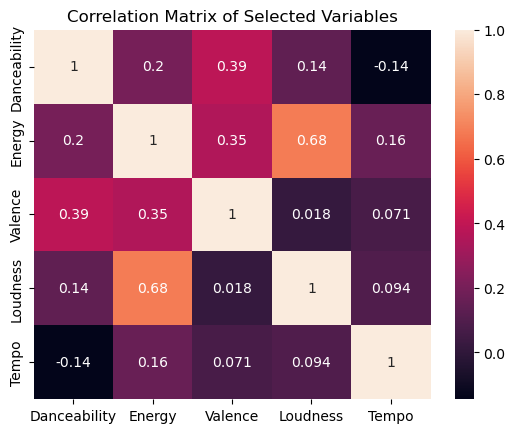

In [10]:
# Let's limit our dataset to continuous measures that describe
# musical features of songs, and see what patterns emerge among 
# this group.

toExplore = ['Danceability',
             'Energy',
             'Valence',
             'Loudness',
             'Tempo']

viz = bh100[toExplore].corr()

sns.heatmap(viz, annot=True)
plt.title('Correlation Matrix of Selected Variables')
plt.show() 

## Question-Driven Selection <a id="question"></a>

Question-driven selection involves identifying the attributes within a dataset that are most appropriate for addressing a particular question–whether that question is posed by a student, or posed as a driving question within curriculum materials themselves. We suggest making 3-5 attributes available for a given question in these curricular configurations. When students are constructing their own questions, we recommend encouraging them to also brainstorm what kind of data they would need to address their questions _before_ they have access to a dataset. Once they are provided with access, we suggest asking students to make predictions and construct hypotheses about what patterns they might find. 

Below, we assemble data to address the simple descriptive question, "How has the longevity of songs on the charts changed over the years?" One might ask students to quickly verbally describe or sketch their predictions. Then, after observing that the dataset includes information about the year a song is released and the number of weeks it appeared on the Billboard charts, they might be encouraged to return to their predictions and make them more concrete using the specific measures and ranges they observe.

In [11]:
# how has the longevity of songs on the charts changed over the years?

toExplore = ['Song Name','Year Released','Weeks on BH100'] #

bh100[toExplore]

,Song Name,Year Released,Weeks on BH100
0,4 Da Gang,2021,7
1,ZaZa,2021,1
2,Way Less Sad,2021,4
3,Monsters,2021,17
4,Better Days,2021,1
...,...,...,...
29489,Young And Warm And Wonderful,1958,2
29490,Firefly,1958,13
29491,Come Prima,1958,7
29492,Here I Stand,1958,5


Below, we create a scatterplot with each song arranged by year of release on the x-axis and number of weeks on the Billboard Hot 100 chart on the y-axis. 

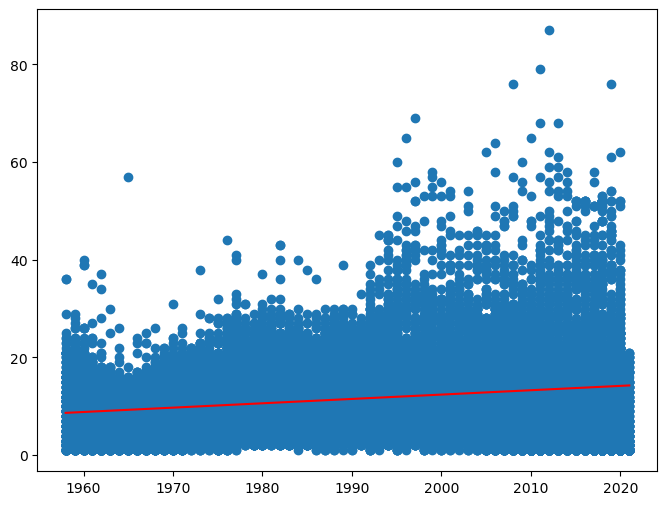

In [12]:
plt.figure(figsize=(8, 6)) # Adjust figure size if needed
plt.scatter(bh100['Year Released'], bh100['Weeks on BH100'])

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(bh100['Year Released'], bh100['Weeks on BH100'], 1)

# Create the line of best fit equation
line = slope * bh100['Year Released'] + intercept

plt.plot(bh100['Year Released'], line, color='red', label='Line of Best Fit')

Both the scatterplot and the line of best fit suggest there has been some increase in the number of total weeks a song has remained on the Billboard Hot 100 charts. However, it is difficult to tell without more analysis whether this is simply the function of increased variability, or an overall increase in song longevity on the charts. These questions can lead to additional investigations that are conducive to additional modeling methods or hypothesis testing.

# About the Billboard Hot 100 Dataset <a id='about'></a>

This dataset includes every song that's ever appeared on the Billboard Hot 100 Charts (August 1958-May 2021). Only some of the available attributes are initially shown. Use the "attributes" tab in the "Choosy" window to select which attributes or attribute groups to show and hide.

### About the Attribute Groups
Each record includes Basic Info such as the Song Name, Performer, the Month and Year released; Popularity measures such as the song's highest Billboard position and the number of weeks the song stayed on the the Hot 100 list; and a list of the Genre(s) represented by the song. When available, each song record also includes information scraped from Spotify including the Spotify ID, URL, and popularity on the Spotify app. A number of Spotify-generated measures of musical features are described in Performance Features exploring the song's "speechiness," "liveness," and other inferred performance features; Emotion Features exploring inferred features such as the song's energy level and valence; and Sound Features such as the song's tempo, time signature, and loudness. 

### About the Attributes
- Song Name
- Performer
- Year Released
- *Highest BH100 Position* was computed this from "Hot Stuff" database using min position listing for this SongID
- Spotify Popularity
- *Danceability* describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- *Energy* is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- *Loudness* of a track is measured in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- *Speechiness* detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- *Valence* is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- *Tempo* is estimated in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### History and Purpose
This dataset was initially imported into CODAP in Summer 2022 for a teacher workshop assosicated with the Writing Data Stories project (DGE-2430522). It was updated in Spring 2023, and is being used as part of the Writing Data Stories project and the City University of New York's Computing Integrated Teacher Education (CUNY CITE) program. 

### Data Sources and Data Cleaning
This dataset was constructed by Sean Miller (github handle: HipsterVizData) using APIs to download Billboard Hot 100 (BH100) and Spotify (S) data. The full dataset and additional information about its original construction can be accessed at this link. Michelle Wilkerson of the WDS team  merged the two tables in the dataset by mapping the BH100 Song Name attribute to the Spotify SongID, removing all Spotify records that did not have a corresponding BH100 entry but retaining BH100 songs that did not have corresponding Spotify entries. Michelle imported attribute descriptions from the original dataset, editing a few descriptions for readability at the middle school level, consolidated music genres into 7 major genre flags while retaining the full genre list as a separate attribute; and removed several attributes for simplicity. Michelle also grouped Spotify-generated song features into three categories (Performance, Emotion, and Sound Features) visible in the "Choosy" menu.